<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 2*

# 📝 Assignment

# 카이제곱검정


## 1. 공공데이터 조작 연습. 

국가 통계 포털에서 아래 이미지를 참조하여

<https://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01#SelectStatsBoxDiv>

**2020년 8월**에 해당하는 규모별 미분양현황 에 대한 데이터셋을 생성하세요. 

<img src='https://i.imgur.com/aZc4UJO.png' width = 500>

- `60m이하`, `60~85m`, `85m초과`의 3개 규모와 (column)
- `서울`, `대전`, `대구`, `부산` 4개의 지역을 포함해야합니다. (row)
- 데이터가 없는 경우는 0으로 처리하세요.

이후 데이터셋을 colab으로 불러오세요. 이때 변수의 이름은 `df`를 사용합니다.


In [96]:
import pandas as pd

df = pd.read_csv('/content/규모별_미분양현황_20210514121855.csv', encoding='euc-kr')
df.columns = ['시도', '부문', '규모', '2020_08', '2020_09']

In [97]:
df_8 = df.pivot_table ( index = '시도' ,  columns = '규모' ,  values = '2020_08', aggfunc='sum')
df_8 = df_8.rename(columns = {'60㎡이하' : '~60㎡', '85㎡초과' :'85㎡~'})
df_8[['60∼85㎡',	'~60㎡',	'85㎡~']] = df_8[['60∼85㎡',	'~60㎡',	'85㎡~']].apply(pd.to_numeric)
col0, col1, col2 =[df_8.columns[0]] , [df_8.columns[1]] , [df_8.columns[2]]
new_col=col1+col0+col2
df_8=df_8[new_col]
df_8

규모,~60㎡,60∼85㎡,85㎡~
시도,,,
대구,143,1437,44
대전,782,1,0
부산,577,735,142
서울,54,2,0


In [98]:
col = ['~60m2', '60~85m2', '85m2~']
row = ['서울', '대전', '대구', '부산']

## 2. 지역에 대해서 one-sample chi-square test를 실행, 해당 결과를 `chi1`에 저장 후 설명해보세요.

예시) 만약 **9월달 데이터**를 기준으로 한다면
```python
 [0+0+0+52+2+0, 0+0+0+590+665+142, 0+0+0+113+1061+42, 0+0+0+772+1+0]
```
을 비교 하게 될 것입니다.




χ2  통계치 의 계산식
χ2=∑(observedi−expectedi)2/(expectedi)

p-value = 1 - stats.chi2.pdf(x2, df = (자유도))

 - 귀무가설 : 지역별 미분양 현황의 값은 지역과 독립적일 것이다. / 지역에 상관없이 공평하게 나올 것이다. ( p-value = 0 < 0.05, 기각 )
 - 대안가설 : 지역별 미분양 현황의 값은 지역과 독립적이지 않을 것이다. / 지역에 상관없이 공평하게 나오지 않을 것이다. ( p-value < 0.05, 채택 )

 - 따라서 지역별 미분양 현황의 값은 지역과 연관이 있다.

In [99]:
import numpy as np
from scipy import stats
df_one_chi = df_8.sum(axis = 1)
exp = np.sum(df_one_chi) / len(df_one_chi)
one_chi_x2 = ((df_one_chi - exp)**2) / exp
chi1 = one_chi_x2.sum()
p_value = 1 - stats.chi2.cdf(chi1, df = (4-1))
chi1, p_value

(1564.4572376818994, 0.0)

In [100]:
from scipy.stats import chisquare
chi1 = chisquare(df_one_chi)[0]
chisquare(df_one_chi)

Power_divergenceResult(statistic=1564.4572376818994, pvalue=0.0)

## 3. 지역과 규모에 대해서 two-sample chi-square test를 실행, 해당 결과를 `chi2`에 저장 후 설명해보세요.

예시) **9월달 데이터**를 기준으로 한다면

| |-60 | 60-85 | 85- |
|:-:|:-:|:-:|:-:|
|서울|52|2|0|
|대전|772|1|0|
|대구|113|1061|42|
|부산|590|665|142|

에 대해서 검정해야 할 겁니다.

# Result

 - 귀무가설 : 미분양 현황의 값은 지역과 규모에 따라 독립적이다. / 통계적으로 유의미한 관계가 없다. ( p-value = 0 < 0.05, 기각 )
 - 대안가설 : 미분양 현황의 값은 지역과 규모에 따라 독립적이지 않다. / 통계적으로 유의미한 관계가 있다. ( p-value < 0.05, 채택 )

 - 따라서 미분양 현황의 값은 지역과 규모에 따라 통계적으로 유의미한 관계가 있다.

In [101]:
from scipy.stats import chi2_contingency
chi2 = chi2_contingency(df_8)[0]
chi2_contingency(df_8)[0]
# chi2_contingency(df_8, correction = False) # correction = 모집단에서 비교를 하느냐(Faluse) , 수집된 데이터에서 비교를 하느냐(True), base = True
print(' chi2 = {0}\n p_value = {1}\n 자유도 = {2}\n array = \n{3}'.format(chi2_contingency(df_8)[0], chi2_contingency(df_8)[1], chi2_contingency(df_8)[2], chi2_contingency(df_8)[3]))

 chi2 = 2064.5767314171994
 p_value = 0.0
 자유도 = 6
 array = 
[[645.12228746 901.76155221  77.11616033]
 [311.04110288 434.77789124  37.18100587]
 [577.59101353 807.36533061  69.04365586]
 [ 22.24559612  31.09522594   2.65917794]]


### 4. 2번에 대해서 NumPy 를 사용하여 (Scipy를 사용하지 않고) $\chi^2$ test 시행 후 2번의 결과와 비교해보세요. 

- `obs`, `exp`, `chi`라는 변수를 사용해야합니다.

이 후 `chi2_contingency()`의 결과물과 비교해보세요

\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

expectedi,j=(rowitotal)(columnjtotal)/(total observations)

\begin{align}
\chi^2 = \sum \frac{(observed_i-expected_i)^2}{(expected_i)}
\end{align}

χ2=∑(observedi−expectedi)2/(expectedi)

# Result :

 문제 2번과 차이 없음, p-value도 동일한 0이 나옴

In [102]:
import numpy as np
from scipy import stats
obs = df_8.sum(axis = 1)
exp = np.sum(obs) / len(obs)
one_chi_x2 = ((obs - exp)**2) / exp
chi = one_chi_x2.sum()
p_value = 1 - stats.chi2.cdf(chi, df = (4-1))
print(chi, p_value)
chi2_contingency(df_8)

1564.4572376818994 0.0


(2064.5767314171994, 0.0, 6, array([[645.12228746, 901.76155221,  77.11616033],
        [311.04110288, 434.77789124,  37.18100587],
        [577.59101353, 807.36533061,  69.04365586],
        [ 22.24559612,  31.09522594,   2.65917794]]))

In [103]:
chi

1564.4572376818994

In [104]:
# 헐.. 3번 결과와 비교했음.

sum_col, sum_row = np.sum(df_8, axis = 0), np.sum(df_8, axis = 1)
total_obs = np.sum(np.sum(df_8))
exp2 = np.array([[sum_row[i]*sum_col[j] for j in range(3)] for i in range(4)]) / total_obs
two_chi_x2 = ((df_8 - exp2)**2) / exp2
chi2 = np.sum(np.sum(two_chi_x2))
chi2_p_value = 1 - stats.chi2.cdf(chi2, df = (4-1)*(3-1))
print(chi2 , chi2_p_value)
chi2_contingency(df_8)

2064.5767314171994 0.0


(2064.5767314171994, 0.0, 6, array([[645.12228746, 901.76155221,  77.11616033],
        [311.04110288, 434.77789124,  37.18100587],
        [577.59101353, 807.36533061,  69.04365586],
        [ 22.24559612,  31.09522594,   2.65917794]]))

In [105]:
df_8.shape

(4, 3)

In [106]:
df_8.sum().sum()

3917

In [107]:
round(chi1)

1564

In [108]:
round(chi2)

2065

In [109]:
max(obs)

1624

In [110]:
exp

979.25

In [111]:
round(chi)

1564

## 🔥 도전 과제

아래 세가지를 다하면 됩니다.

### 1. Function

4번에서 사용한 one sample chisquare test를 함수의 형태로 변경하세요.

In [112]:
v1 = [18,22,20,15,23,22]
v2 = [5,23,26,19,24,23]

def myChisq(value):
  import numpy as np
  from scipy import stats
  obs = value                   # 입력값
  exp = np.sum(obs) / len(obs)  # 기대값
  x2 = ((obs-exp)**2) / exp     # x**2
  chi = x2.sum()                # chisqure
  p_value = 1 - stats.chi2.cdf(chi, df = len(value)-1)  # p_value
  return print('value = {}, chisquare = {} , p_value = {}'.format(value, chi, p_value)) # 내용을 채우세요.

myChisq(v1) 

# chisquare값과 pvalue를 출력해야합니다.

myChisq(v2)

value = [18, 22, 20, 15, 23, 22], chisquare = 2.3000000000000003 , p_value = 0.8062668698851285
value = [5, 23, 26, 19, 24, 23], chisquare = 14.8 , p_value = 0.011251979028327308


### 2. ANOVA

아래 링크를 참조하여 ANOVA 에 대한 글을 읽고

<https://partrita.github.io/posts/ANOVA-python/>

다음 `4개 그룹에 대해서 평균의 차이가 있는지`에 대한 가설 검정을 시행하세요.

A : `38 33 35 92 76 97 88 41 11  9`

B : `18 52 62 48 30 40 87 12 97 82`

C :  `28 90  5 49 66 73 96 80  4 17`

D : ` 8 99  4 12  7 64 18 10  9 20`

# Result
 - 귀무가설 : ' 4개 그룹에 대해서 평균의 차이가 유의하게 나지 않는다. ' ( p_value = 0.1792 > 0.05, 채택)
 - 대안가설 : ' 4개 그룹에 대해서 평균의 차이가 유의하게 난다. ' ( p_value > 0.05, 기각 )

 - 따라서 4개의 그룹에 대한 평균 차이가 유의하게 나지 않는다.

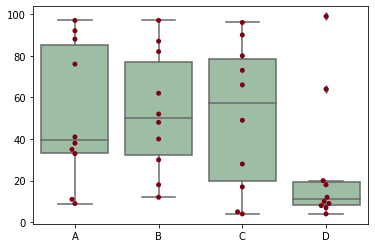

In [113]:
import pandas as pd

df_challenge2 = pd.DataFrame({ 'A' : [38, 33, 35, 92, 76, 97, 88, 41, 11, 9], 'B' : [18, 52, 62, 48, 30, 40, 87, 12, 97, 82], 'C' : [28, 90, 5, 49, 66, 73, 96, 80, 4, 17], 'D' : [8, 99, 4, 12, 7, 64, 18, 10, 9, 20]})
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(data=df_challenge2, color='#99c2a2');
ax = sns.swarmplot(data=df_challenge2, color='#7d0013');
plt.show()

In [114]:
stats.f_oneway(df_challenge2['A'], df_challenge2['B'], df_challenge2['C'], df_challenge2['D'])

F_onewayResult(statistic=1.7249594239128412, pvalue=0.17920877113948797)

## 3. Sign Test

아래 링크를 참조하여 Sign Test에 대한 글을 읽고

<https://en.wikipedia.org/wiki/Sign_test>

다음 데이터에서 두 그룹간에 차이가 있다에 대한 Sign Test의 과정과 결과를 설명하세요

|A|B|
|:-:|:-:|
|142|138|
|140|136|
|144|147|	
|144|139|	
|142|143|	
|146|141|	
|149|143|	
|150|145|	
|142|136|	
|148|146|	

# Result
 - 귀무가설(H0) : 두 그룹간에 차이가 없을 것이다. ( 평균과 같을 것이다. ) ( p = 0.3437 > 0.05, 채택 )
 - 대안가설(Ha) : 두 그룹간에 차이가 있을 것이다. ( 기준 A : B보다 큰 경우 7개, B보다 작은 경우 3개) ( p > 0.05, 기각 )

In [115]:
import pandas as pd
from scipy import stats
# pip install --upgrade --no-deps statsmodels
import statsmodels.api
A = [142, 140, 144, 144, 142, 146, 149, 150, 142, 148]
B = [138, 136, 147, 139, 143, 141, 143, 145, 136, 146]
df_challenge3 = pd.DataFrame({'A' : A, 'B' : B})
challenge_p_value = statsmodels.stats.descriptivestats.sign_test(df_challenge3['B']-(np.sum(A)/len(A)))[1]
statsmodels.stats.descriptivestats.sign_test(df_challenge3['B']-(np.sum(A)/len(A)))
# M , p_value
# M = (N(+) - N(-))/2
# M = ( 3 - 7 ) / 2 = -2

(-2.0, 0.3437499999999999)

In [116]:
A_n = len(A)
A_mean = np.sum(A) / A_n
tem = B - A_mean
sign = ['+' if i > 0 else '-' for i in tem]
sign_pos = sign.count('+')
sign_neg = sign.count('-')
M = (sign_pos - sign_neg) / 2
(sign_pos - sign_neg) / 2

# p_value를 보는 법을 모르겠습니다.. ㅠㅠ
from  scipy.stats  import  binom 
import matplotlib.pylab as plt
binom(min(sign_pos, sign_neg), sign_pos + sign_neg, .5) # p_value

In [117]:
print('표본의 수 = {}개, A의 평균 = {}, A가 B보다 큰경우(-) = {}개, A가 B보다 작은경우(+) = {}개, M = {}, p_value = {}'.format(A_n, A_mean, sign_neg, sign_pos, M, challenge_p_value))

표본의 수 = 10개, A의 평균 = 144.7, A가 B보다 큰경우(-) = 7개, A가 B보다 작은경우(+) = 3개, M = -2.0, p_value = 0.3437499999999999
